In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('KdTreeData.csv')

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      300 non-null    int64
 1   sub 1   300 non-null    int64
 2   sub 2   300 non-null    int64
 3   sub 3   300 non-null    int64
 4   sub 4   300 non-null    int64
 5   sub 5   300 non-null    int64
 6   sub 6   300 non-null    int64
 7   sub 7   300 non-null    int64
 8   sub 8   300 non-null    int64
 9   sub 9   300 non-null    int64
 10  sub 10  300 non-null    int64
dtypes: int64(11)
memory usage: 25.9 KB


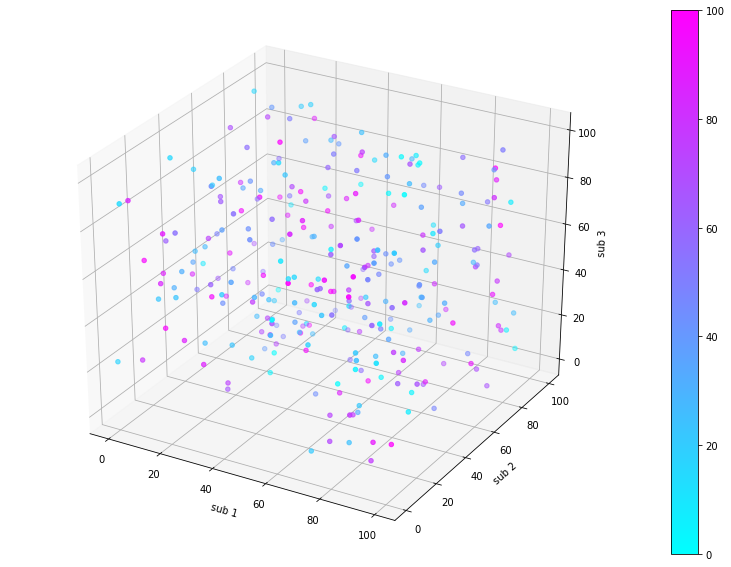

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df['sub 1'], df['sub 2'], df['sub 3'], c=df['sub 4'], cmap= "cool")
ax.set_xlabel('sub 1', fontsize=10, rotation=150)
ax.set_ylabel('sub 2', fontsize=10, rotation=150)
ax.set_zlabel('sub 3', fontsize=10, rotation=60)
fig.colorbar(p)
plt.show()
fig.savefig('data.png')

In [3]:
print(df.to_numpy()[:,1:])

[[66 24 76 ... 33  7 16]
 [92 52 49 ... 44 85 40]
 [37 95 13 ... 14 57  7]
 ...
 [90 11 91 ...  6 78 50]
 [ 5 27 98 ... 62 60 61]
 [85  3 25 ...  1 92 34]]


In [4]:
class Node:
    def __init__(self, point, leftNode, rightNode):
        self.point = point
        self.leftNode = leftNode
        self.rightNode = rightNode

    def getDimension(self):
        return len(self.point) - 1

In [5]:
def generateKDTree(pointList, depth = 0):
    if pointList.size == 0:
        return None

    k = len(pointList[0, 1:])  
    axis = (depth % k)+1

    pointList = pointList[pointList[:, axis].argsort()]
    median = len(pointList) // 2

    return Node( pointList[median], 
        generateKDTree(pointList[:median], depth + 1),
        generateKDTree(pointList[median + 1 :], depth + 1),
    )

theTree  = generateKDTree(df.iloc[:,:].to_numpy())
print(theTree.point)

[158  53  15  74   9  95  16  58  89  63  92]


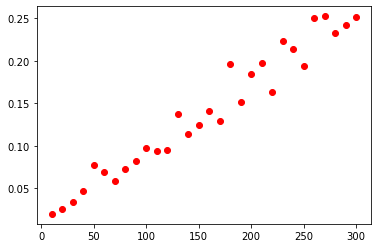

In [48]:

import timeit
import math
import random
ns = np.linspace(10, 300, 30, dtype=int)

# red plots
ts = [timeit.timeit('generateKDTree(df.iloc[:lim,:].to_numpy())', 
                  setup='lim={};'.format(n),
                  globals=globals(),
                  number=100)
      for n in ns]
plt.plot(ns, ts, 'or')

In [ ]:
import timeit
import math
import random

trees = list()
for i in range(10,300,10):
      tree = generateKDTree(df.iloc[:i,:].to_numpy())
      trees.append(tree)

# red plots
ts = [timeit.timeit('generateKDTree(df.iloc[:lim,:].to_numpy())', 
                  setup='lim={};'.format(n),
                  globals=globals(),
                  number=100)
      for n in ns]
plt.plot(ns, ts, 'or')

In [6]:
def printTree(node, level=0):
    if node != None:
        printTree(node.leftNode, level + 1)
        print(' ' * 4 * level + '-> ' + str(node.point[0]))
        printTree(node.rightNode, level + 1)

printTree(theTree)

                                -> 255
                            -> 29
                        -> 209
                            -> 194
                    -> 297
                                -> 146
                            -> 157
                        -> 118
                            -> 273
                -> 195
                                -> 75
                            -> 150
                        -> 25
                            -> 41
                    -> 175
                            -> 119
                        -> 282
                            -> 293
            -> 39
                                -> 199
                            -> 81
                        -> 162
                            -> 136
                    -> 31
                                -> 277
                            -> 101
                        -> 54
                            -> 219
                -> 108
                                -> 155
                      

Small scale experiment

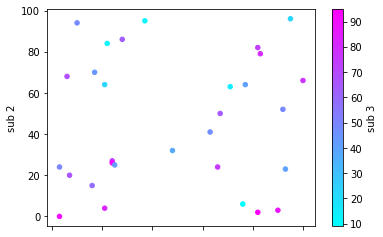

    id  sub 1  sub 2  sub 3
0    1     66     24     76
1    2     92     52     49
2    3     37     95     13
3    4      7     20     67
4    5     77     64     41
5    6     24     27     73
6    7     10     94     48
7    8    100     66     77
8    9     90      3     88
9   10      3     24     50
10  11     17     70     44
11  12     83     79     80
12  13     76      6      9
13  14     24     26     95
14  15     82     82     74
15  16     95     96     23
16  17     82      2     95
17  18     21      4     82
18  19      6     68     69
19  20     22     84     13
20  21     16     15     59
21  22     93     23     40
22  23     21     64     23
23  24     28     86     64
24  25     25     25     43
25  26     67     50     65
26  27     71     63     15
27  28      3      0     91
28  29     48     32     38
29  30     63     41     47


In [7]:
small2D = df.iloc[:30, :4]

small2D.plot(kind = 'scatter', x = 'sub 1', y = 'sub 2', c='sub 3', colormap ="cool" )

plt.show()
print(small2D)

In [8]:
small2D = df.iloc[:30, :3]
smallTree  = generateKDTree(small2D.to_numpy()[:, :3])
printTree(smallTree)

                -> 28
            -> 4
                -> 10
        -> 21
                -> 18
            -> 25
                -> 14
    -> 6
                -> 19
            -> 11
                -> 7
        -> 23
                -> 20
            -> 24
                -> 3
-> 29
                -> 1
            -> 30
                -> 26
        -> 13
                -> 17
            -> 9
                -> 22
    -> 2
                -> 27
            -> 5
                -> 15
        -> 12
                -> 8
            -> 16


In [9]:
def plotKDTree(node, axes, dimensions,  level=0  , limit = [0,100,0,100]): 
    if node != None :
        newLimit  = limit.copy()
        if (level % 2 == 1):
            newLimit[3] = node.point[2]
        elif (level % 2== 0):
            newLimit[1] = node.point[1]
        plotKDTree(node.leftNode,  axes, dimensions, level = level + 1, limit = newLimit )
        
        # cmap = cm.get_cmap(name='cool')
        if (level % 2 == 0):  # x axisz
            axes.vlines(node.point[1], limit[2], limit[3],color = 'black') 
            # axes.vlines(node.point[1], limit[2], limit[3],color = cmap(level/dimensions*2) )
        elif (level % 2== 1): # y axis
            axes.hlines(node.point[2], limit[0], limit[1], color = 'black')
            # axes.hlines(node.point[2], limit[0], limit[1], color = cmap(level/dimensions*2))
                
        newLimit  = limit.copy()
        if (level % 2 == 1):
            newLimit[2] = node.point[2]
        elif (level % 2== 0):
            newLimit[0] = node.point[1]

        plotKDTree(node.rightNode, axes, dimensions, level = level + 1, limit = newLimit)
    limit = [0,0,0,0]

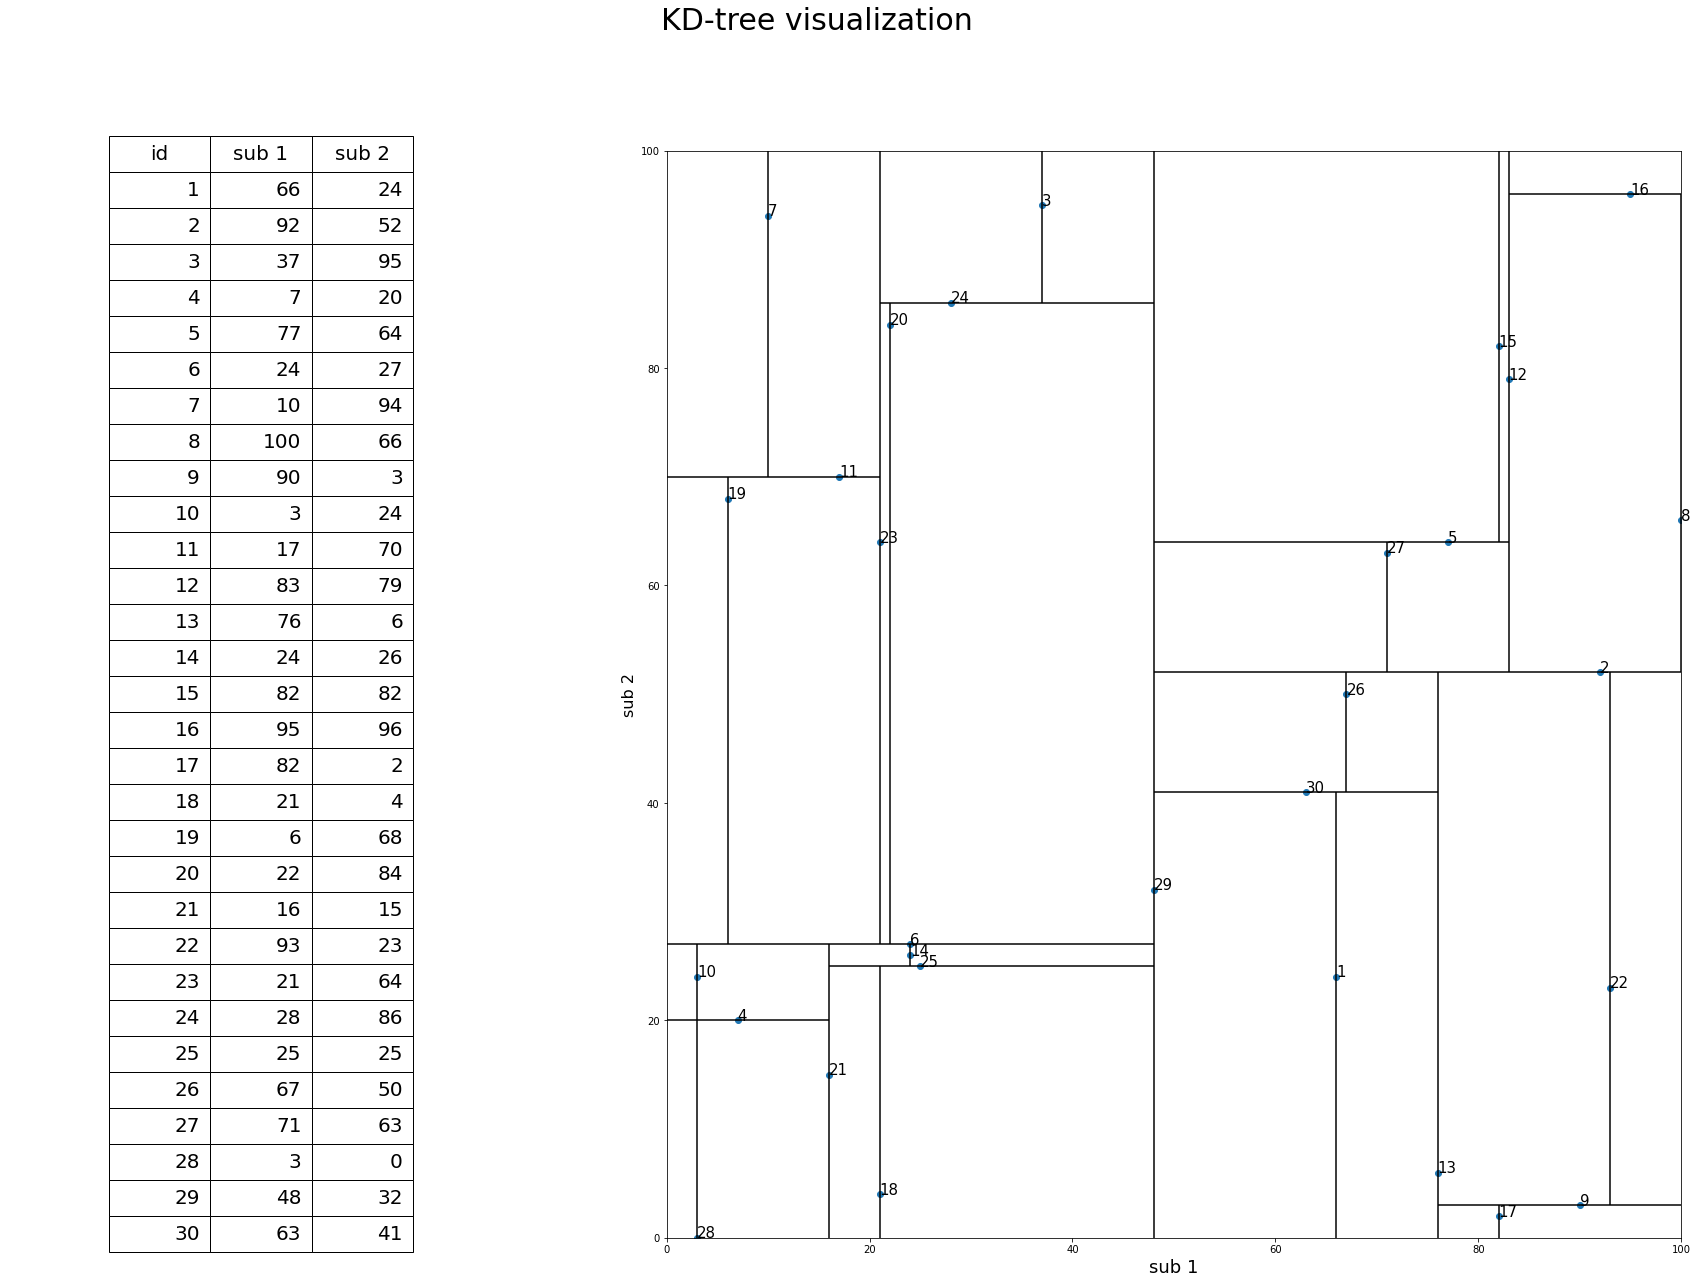

In [10]:

fig2 = plt.figure(figsize=(30,20))
# fig2, (table1, ax2) = plt.subplots(1, 2,figsize=(20,10) )
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
fig2.suptitle('KD-tree visualization',fontsize=30)
ax2 = fig2.add_subplot(gs[1])
ax2.scatter(small2D['sub 1'], small2D['sub 2'])
plt.xlabel('sub 1', fontsize=18)
plt.ylabel('sub 2', fontsize=16)
table1 = fig2.add_subplot(gs[0])
table1.axis('off')
table1.axis('tight')

tb1 = table1.table(cellText=small2D.values, colLabels=small2D.columns, colWidths=[0.2 for x in small2D.columns],  loc='center')
# tb1.auto_set_font_size(False)
tb1.set_fontsize(20)
tb1.scale(1, 3)
plotKDTree(smallTree, ax2,2 )
for index, row in small2D.iterrows():
     ax2.annotate(row["id"], (row['sub 1'], row['sub 2']), fontsize=15)
ax2.margins(x = 0, y = 0)
plt.show()
fig2.savefig('KD-tree_visualization10.png')


search

In [32]:
def nearestNeighbors(root, point, minDistance = 9999,  depth = 0):
    if not (root.leftNode == None or root.rightNode == None):
        k = root.getDimension() 
        axis = (depth % k)
        # print(depth)
        if point[axis] > root.point[axis + 1]:
            node, minDistance = nearestNeighbors(root.rightNode, point, minDistance, depth + 1)
        else:
            node, minDistance = nearestNeighbors(root.leftNode, point, minDistance, depth + 1)
        
        curDistance = np.linalg.norm( root.point[1:] - point)
        if curDistance < minDistance:
            minDistance = curDistance
            node = root
        
        tmp = np.copy(root.point[1:])
        tmp[axis] = point[axis]
        limitDistance = np.linalg.norm(tmp - point)
        if limitDistance < minDistance:
            if point[axis] > root.point[axis + 1]:
                node, minDistance = nearestNeighbors(root.leftNode, point, minDistance, depth + 1)
            else:
                node, minDistance = nearestNeighbors(root.rightNode, point, minDistance, depth + 1)
            
            curDistance = np.linalg.norm( root.point[1:] - point)
            if curDistance < minDistance:
                minDistance = curDistance
                node = root

    else:
        minDistance = np.linalg.norm( root.point[1:] - point)
        node = root


    return node, minDistance



def seacheNearestNeighbors(root, point):
    dimension = root.getDimension()  
    if not dimension  == len(point):
        raise Exception("tree and point have diffrent dimension")
    return nearestNeighbors(root, point)

point = np.array([68,73,29,84,49,23,51,88,6,19])
print(point)
print(len(theTree.point))
pointMin, distance =  seacheNearestNeighbors(theTree, point )
print(pointMin.point, '- d =', distance)

[68 73 29 84 49 23 51 88  6 19]
11
[84 95 87 20 78 88 41  1 72 10 34] - d = 76.70723564306043


In [50]:
def nearestNeighborsrec(root, point, k, l,   depth = 0):
    if root == None:
        return l
    # print(minDistance)
    curDistance = np.linalg.norm( root.point[1:] - point)
    # if curDistance < minDistance:
    
    if len(l) > k:
        l.sort(key=lambda x: x[1])
        # for x in l:
        #     print(x)
        # print()
        l.pop()
        minDistance = l[-1][1]
    else:
        l.append([root.point.tolist(),curDistance])
    if root.leftNode == None or root.rightNode == None:
        return l
    
    d = root.getDimension() 
    axis = (depth % d)
    # print(d, "- ", axis, "--", depth)
        
    if point[axis] >= root.point[axis+1]:
        branch1, branch2 = root.rightNode, root.leftNode
    else:
        branch2, branch1 = root.rightNode, root.leftNode
    
    nearestNeighborsrec(branch1, point, k, l, depth + 1)

    pivot = np.copy(root.point[1:])
    pivot[axis] = point[axis]
    pivotDistance = np.linalg.norm(pivot - point)
    
    l.sort(key=lambda x: x[1])
    last = l[-1][1]
    if len(l) < k :
        nearestNeighborsrec(branch2, point, k, l,  depth + 1)
    elif last > pivotDistance:
        nearestNeighborsrec(branch2, point, k, l, depth + 1)
    return l



def seacheNearestNeighborsrec(root, point, k):
    dimension = root.getDimension()  
    if not dimension  == len(point):
        raise Exception("tree and point have diffrent dimension")
    l = list()
    return nearestNeighborsrec(root, point, k, l)

point = np.array([68,73,29,84,49,23,51,88,6,19])
# print(point)
# print(len(theTree.point))
pointMin =  seacheNearestNeighborsrec(theTree, point, 10 )
for point in pointMin:
    print(point)

[[228, 96, 81, 45, 78, 43, 52, 36, 51, 11, 8], 61.29437168288782]
[[84, 95, 87, 20, 78, 88, 41, 1, 72, 10, 34], 76.70723564306043]
[[207, 64, 39, 53, 75, 38, 16, 29, 69, 53, 55], 79.68061244744545]
[[137, 91, 60, 36, 95, 1, 5, 44, 77, 69, 47], 91.7551088495894]
[[265, 91, 76, 53, 53, 94, 76, 56, 58, 40, 10], 95.24179754708538]
[[12, 83, 79, 80, 46, 24, 53, 82, 91, 42, 59], 98.4733466477097]
[[97, 54, 64, 19, 74, 6, 29, 90, 59, 1, 94], 101.85283501208987]
[[129, 92, 73, 54, 72, 7, 41, 26, 74, 73, 63], 103.33924714260309]
[[76, 78, 61, 20, 76, 73, 67, 62, 2, 15, 36], 103.86529738079028]
[[227, 88, 94, 80, 89, 85, 31, 94, 92, 71, 37], 106.02358228243375]


29


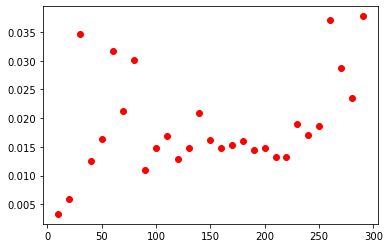

In [60]:
import timeit
import math
import random

trees = list()
for i in range(10,300,10):
      tree = generateKDTree(df.iloc[:i,:].to_numpy())
      trees.append(tree)
point = np.array([68,73,29,84,49,23,51,88,6,19])
print(len(trees))
# red plots
ts = [timeit.timeit('seacheNearestNeighborsrec(trees[n], point, 10 )', 
                    setup='n={};'.format(i),
                    globals=globals(),
                    number=20)
      for i in range(29)]
plt.plot(list(range(10,300,10)), ts, 'or')

In [29]:
points = np.random.randint(101, size=(10, 10))
# point = np.array([68,73,29,84,49,23,51,88,6,19])
print(points)

[[11 92 66 67 99 67 85 11 12  3]
 [27 12 10 89 76 76 51 60 32 85]
 [90 93 91 22 77 13 61 17 19 41]
 [20 18 66 92 22 83 70 88 11 33]
 [11 10 60 13 63 83 85 38 40 18]
 [41 37 58 73 95 46 79 48 52 36]
 [51 40 17 27 29 94 88 78 85 78]
 [53 86 18 18 67 50 15 64 49  8]
 [71 35 84 97 38  0 63 31  2 24]
 [92 14 35 32 27  3 22 95 67 80]]


In [ ]:
def nearest(dataFrame, point):
    df = dataFrame.reset_index()
    distMin = np.linalg.norm( df.iloc[0].to_numpy()[2:] - point)
    indexMin = 0
    for index, row in df.iterrows():
        dist = np.linalg.norm(row.to_numpy()[2:] - point)
        if dist < distMin:
            distMin = dist
            indexMin = index

    return df.iloc[indexMin], distMin 

pointMin, distance = nearest(df, point)
print(pointMin.to_numpy(), '- d =', distance)

[37 38 64 13 43 18 66 42 63 28 37 44] - d = 323.7406369302439


In [ ]:
result = list()

for point in points:
    pointMin, distance = nearest(df, point)
    # print(pointMin.iloc[:9].t[o_numpy(), '- d =', distance)
    result.append([pointMin.iloc[1:].tolist(), distance])

# result.sort(key=lambda x: x[0][0])
for i in result:
    print(i)


[[267, 33, 69, 9, 26, 21, 72, 67, 95, 59, 83], 67.97058187186572]
[[52, 27, 97, 78, 40, 83, 84, 70, 17, 22, 26], 59.48949487094339]
[[121, 74, 70, 64, 80, 68, 89, 78, 88, 11, 60], 60.15812497078013]
[[213, 43, 53, 63, 30, 100, 10, 70, 1, 40, 30], 59.632206063502295]
[[224, 86, 3, 83, 95, 95, 7, 46, 60, 12, 0], 71.21797525905943]
[[242, 68, 20, 10, 73, 69, 92, 15, 10, 18, 97], 63.03967004989794]
[[292, 57, 64, 49, 79, 22, 27, 7, 55, 26, 81], 68.74590896918885]
[[287, 95, 31, 63, 35, 8, 99, 24, 95, 46, 90], 53.5723809439155]
[[299, 5, 27, 98, 15, 22, 83, 97, 62, 60, 61], 56.231663678038196]
[[102, 44, 25, 84, 57, 34, 68, 63, 98, 43, 72], 68.044103344816]


In [33]:
result = list()

for point in points:
    pointMin, distance =  seacheNearestNeighbors(theTree, point )
    # print(pointMin.point, '- d =', distance)
    result.append([pointMin.point.tolist(), distance])

# result.sort(key=lambda x: x[1])
for i in result:
    print(i)


[[170, 39, 73, 95, 65, 72, 80, 84, 11, 0, 18], 57.07889277132134]
[[131, 24, 20, 48, 96, 90, 67, 70, 75, 4, 66], 59.782940710540494]
[[8, 100, 66, 77, 34, 17, 52, 57, 8, 22, 73], 86.13942186943211]
[[102, 44, 25, 84, 57, 34, 68, 63, 98, 43, 72], 72.3671196055225]
[[270, 51, 23, 62, 14, 29, 89, 66, 16, 57, 8], 64.8074069840786]
[[141, 9, 88, 71, 56, 82, 44, 82, 73, 76, 31], 74.10128204019145]
[[273, 34, 39, 40, 24, 21, 86, 89, 23, 92, 32], 78.40280607223188]
[[11, 17, 70, 44, 44, 65, 60, 17, 90, 60, 28], 64.87680633323437]
[[290, 59, 52, 86, 92, 43, 59, 72, 9, 42, 27], 78.37091297158659]
[[207, 64, 39, 53, 75, 38, 16, 29, 69, 53, 55], 73.60706487831179]


In [30]:
result = list()

for point in points:
    pointMin =  seacheNearestNeighborsrec(theTree, point ,1)
    # print(pointMin.point, '- d =', distance)
    result.append(pointMin)

# result.sort(key=lambda x: x[0][0][0])
for i in result:
    print(i)

[[[170, 39, 73, 95, 65, 72, 80, 84, 11, 0, 18], 57.07889277132134]]
[[[131, 24, 20, 48, 96, 90, 67, 70, 75, 4, 66], 59.782940710540494]]
[[[212, 93, 70, 63, 56, 62, 8, 81, 41, 3, 48], 63.31666447310692]]
[[[102, 44, 25, 84, 57, 34, 68, 63, 98, 43, 72], 72.3671196055225]]
[[[294, 6, 45, 52, 27, 85, 59, 90, 0, 3, 7], 74.35724578008521]]
[[[19, 6, 68, 69, 80, 42, 49, 74, 40, 59, 15], 75.8485332752058]]
[[[273, 34, 39, 40, 24, 21, 86, 89, 23, 92, 32], 78.40280607223188]]
[[[11, 17, 70, 44, 44, 65, 60, 17, 90, 60, 28], 64.87680633323437]]
[[[237, 85, 2, 75, 97, 18, 20, 90, 21, 45, 18], 69.85699678629192]]
[[[109, 96, 0, 52, 11, 38, 5, 69, 65, 29, 60], 77.5886589650833]]
